# Week 8: Analyzing Gender Signals in the NYT Best Seller List


In this lecture, we begin with by loading a TSV file that adds `first_name` and `gender_signal` column to the NYT Best Seller list dataset discussed last week. The values in this `gender_signal` column were generated using the methods in a separate supplementary notebook. For the purpose of the final exam, **you are only expected to be familiar with material in this main lecture notebook, not the material in the supplementary notebook.** 

As described in the PDF lecture slides for this week, the approximated gender signals in the "gender_signal" column are by no means meant to be objective or definitive. We introduce the process — based on baby name data — explicitly so that you can be informed and critical about the way that gender is routinely discussed and described in Data Science research.

In this notebook, we
* Load the version of the NYT Best Seller List with the added `first_name_` and `gender_signal` columns, `nyt_full_gender_signal.tsv` as a Pandas DataFrame
* Use the `.groupby()` method to group the data by year and gender signal, which gives us counts for the various gender categories in each year of the NYT Best Seller List dataset
* Use the `.sum()` method to get counts of the total number of entries in each year of the Best Seller List dataset, so that we can record the relative proportion of each gender category for each year
* Plot these results in a variety of manners
* Investigate years of particular interest

## Links

All decisions involved in the creation of the `first_name` and `gender_signal` columns of `nyt_full_gender_signal.tsv` are explained in this week's Lecture Slides (PDF) and in the Week 8 Lecture Supplement (Jupyter Notebook), both linked from the syllabus.

This work draws on the [Gender By Name Data Set](https://archive.ics.uci.edu/ml/datasets/Gender+by+Name)

This lecture draws on Melanie Walsh's discussion of the `.groupby()` method found in her chapter [Pandas Basics II](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/02-Pandas-Basics-Part2.html#groupby-columns)

# Loading `nyt_full_gender_signal.tsv` with Pandas

## We'll start by loading a tsv into python with "approximate" gender signals from NYTime full gender signals

Let's begin by importing Pandas and loading `nyt_full_gender_signal.tsv`, the file created in the Supplementary Notebook. This will load a DataFrame with two additional columns: `first_name`, the first word in the existing `author` column, and `gender_signal`, which seeks to approximate the **gender signal** carried by that name. `gender_signal` can take one of five values:
- `F` **Female**: first names given to children of female sex in the Gender By Name dataset 90% or more of the time
- `M` **Male**: first names given to children of male sex in the Gender By Name dataset 90% or more of the time
- `A` **Ambiguous**: first names that do not meet either of the 90% thresholds listed above
- `U` **Unknown**: first names that do not appear in the Gender By Name dataset
- `I` **Initials**: authors whose gender is masked by names given only as initials

In [ ]:
import pandas as pd

nytg_df = pd.read_csv('nyt_full_gender_signal.tsv', sep="\t")

In [ ]:
nytg_df

Now, using a technique introduced last class, let's get the value counts for each of these categories in the `gender_signal` column.

In [ ]:
nytg_df['gender_signal'].value_counts()

## Now let's try making a pie chart from this data

In [ ]:
plot = nytg_df['gender_signal'].value_counts().plot(kind="pie", figsize=(10, 10))
print(plot)

## Ok, so that's pretty cool. But how do we know that these names are accurate? Let's take a look at the 'A' category

Let's now take a look at the actual names that the `"gender_signal"` column is identifying according to various categories. First let's have a look at the `A` or "ambiguous" category: names that are in the list but don't cross the 90% threshold. 

Using a technique introduced last class, we'll create `gender_filter` variable (a boolean Series) that has a true/false value for whether each row has a `"gender_signal"` value equal to `"A"` — then use that to pull out only the rows of the DataFrame where `"gender_signal"` is `"A"`.

In [ ]:
gender_filter = nytg_df['gender_signal']=='A'
type(gender_filter)

## Question for class: Why is this a series? 

## Now let's take a look at this dataframe with just the ambiguous gender signals...


In [ ]:
nytg_df[gender_filter]

Note that the above line of code is equivalent to the below (as discussed in last week's lecture notebook). We just think the above is a bit more legible.

In [ ]:
nytg_df[nytg_df['gender_signal']=='A']

## Ok, now let's take a look at the unqieu names

Now let's select only the `"first_name"` column, and call the `.unique()` method to see all the unique names that our method has identified as `"A"`

In [ ]:
nytg_df[gender_filter]['first_name'].unique()

## And now let's repeat that for the `"U"`, `"I"` — and much larger `"F"` and `"M"` — categories. 

How well is our gender system doing? What are its blind spots? How could it be improved?

In [ ]:
gender_filter = nytg_df['gender_signal']=='I'
sorted(nytg_df[gender_filter]['first_name'].unique())

In [ ]:
gender_filter = nytg_df['gender_signal']=='U'
nytg_df[gender_filter]['first_name'].unique()

In [ ]:
gender_filter = nytg_df['gender_signal']=='F'
nytg_df[gender_filter]['first_name'].unique()

In [ ]:
gender_filter = nytg_df['gender_signal']=='M'
nytg_df[gender_filter]['first_name'].unique()

In [ ]:
nytg_df[nytg_df['first_name'] == 'Dr.']

# Getting the Gender Signal Data into a Useful Form

Let's suppose we've decided our gender signal information is sufficient to proceed with our analysis. The immediate challenge, then, is to get the data into a useful form.

We're interested in knowing how many authors of each gender signal category appears for every year of the dataset.

What data type do want to get our data into? What colums and rows do we want to see, and how do we want them organized? What will the actual values look like?

## Let's use `.groupby()` to group the data into particualr columns

Let's start our journey with the `.groupby()` method, which allows us to group the data by particular columns and perform calculations on it. For instance, let's try grouping out `nytg_df` DataFrame by the `gender_signal` column.

In [ ]:
nytg_df.groupby("gender_signal")

We can perform a few methods on these GroupBy objects. Let's start with `.count()`

In [ ]:
nytg_df.groupby("gender_signal").count()

## Why are these values the same across the rows? 

As you can see, this rearranges our DataFrame so that each possible category in the `"gender_signal"` column now appears as a row, with all the other columns *except* `gender_signal` now appearing along the top. Within the DataFrame, we get counts of many rows containing those particular values for `gender_signal` also have values (of whatever) kind for the other columns — which is not particularly useful information for us, alas, since all the numbers are the same along each row.

We can use the `.size()` method to simplify the output of `.count()`: this gives us the maximum value along that row (which, in this case, is identical for all our columns, because our dataset doesn't have any missing values).

In [ ]:
nytg_df.groupby("gender_signal").size()

If we use `.count()` on the `"year"` column, what do we get?

In [ ]:
nytg_df.groupby("year").count()

We're still not getting what we need — which is a count of how many of each gender signal category appear for each year. For this, we need to `.groupby()` two columns at once, by presenting them to the `.groupby()` method as a list of strings.

This will group our data **first** by year, and **then**, *within each year*, by gender signal.

In [ ]:
nytg_df.groupby(["year", "gender_signal"]).count()

We're getting closer! Let's again use `.size()` to simplify this and output it as a Series rather than a DataFrame

In [ ]:
nytg_df.groupby(['year', 'gender_signal']).size()

## Hmm, but how can we make the gender signal categories less embedded? 

The only issue here is that the gender signal categories are "embedded within" each year — when what we need is just a DataFrame where the years are rows and the columns are the gender categories. 

In Pandas-speak, the gender signal values are "stacked" within the year — and we need to `.unstack()` them!

In [ ]:
nytg_df.groupby(['year', 'gender_signal']).size().unstack()

 ## Hmm, what about these NaN's?

This is *almost* excactly what we need. There is only one problem now: not all years have values for all categories, which will confuse our efforts to work with the data in the next stages. For instance, 2016 has `NaN` for `U` — "Not a Number," indicating missing data. 

Thankfully our friend `.unstack()` will take an argument that tells it what to do with any `NaN` situations. In this case, we want it to replace all those with `0`.

In [ ]:
nytg_df.groupby(['year', 'gender_signal']).size().unstack(fill_value=0)

Hooray! That's what we need! Let's stick it in a variable.

In [ ]:
year_counts = nytg_df.groupby(['year', 'gender_signal']).size().unstack(fill_value=0)

In [ ]:
year_counts

# Calculate Proportion of Each Category for Each Year

Well, it's *almost* everything. The thing we want to calculate in the next step is the **proportion** (or "percentages") of each gender signal category for each year. We don't want to rely on **absolute counts** (just the bare numbers in the columns) because *there are different numbers of entries for each year*, due to the always-changing number of entries on the list, the shift from monthly to weekly lists, etc. 

To calculate **proportions**, we will divide the count for each category by the total number of values for that year. So first let's calculate the total number of entries we have for each year.

You can think of this as a *sum* of all values across an individual row in our `year_counts` DataFrame. 

## `.sum()`


And indeed, the Pandas method we need to calculate the sum of the values in a row is... `.sum()`!

By default, it gives you the sum of *columns* (a "vertical" sum).

In [ ]:
year_counts.sum()

We can specify that we want the sum of the values in a *row* (a "horizontal" sum) by setting the `axis` to `1`.

In [ ]:
year_counts.sum(axis=1)

## Adding a Column to a DataFrame and Filling It with Values

Let's add a new column to our `year_counts` DataFrame that contains these sums. 

The syntax below does the job:
- `year_counts['total']` opens up a new column and calls it `"total"`
- `year_counts.sum(axis=1)` stuffs that new column with the values created above

In [ ]:
year_counts['total'] = year_counts.sum(axis=1)

In [ ]:
year_counts

## Calculating Proportions and Adding Them to a New Row

Now let's calculate the proportions we discussed above. 

Once again, we'll create a new column and stuff it full of new values. Here we will calculate the percentage of `F` labels in every year: number of `F` counts divided by the total number of counts that year, multiplied by 100. Pandas knows we want to perform this calculation for every single row.

In [ ]:
year_counts['prop-F'] = (year_counts['F']/year_counts['total']) * 100

In [ ]:
year_counts

## Now let's plot it

Guess what — by plotting the values of our new column `prop-F` (using techniques introduced in last week's class) we can now produce a very useful plot. Let's analyze it together!

In [ ]:
plot = year_counts['prop-F'].plot(kind='bar', title='Percentage of authors with female first-name gender signals in each year', figsize=(15,8))
print(plot)

Let's now create proportional columns for all the other gender signal categories.

In [90]:
year_counts['prop-A'] = (year_counts['A']/year_counts['total']) * 100
year_counts['prop-M'] = (year_counts['M']/year_counts['total']) * 100
year_counts['prop-U'] = (year_counts['U']/year_counts['total']) * 100
year_counts['prop-I'] = (year_counts['I']/year_counts['total']) * 100

AxesSubplot(0.125,0.125;0.775x0.755)


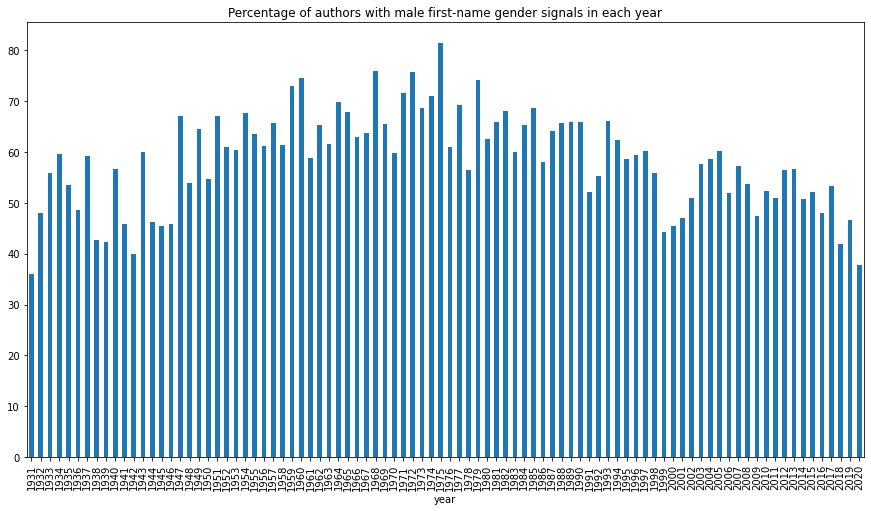

In [91]:
plot = year_counts['prop-M'].plot(kind='bar', title='Percentage of authors with male first-name gender signals in each year', figsize=(15,8))
print(plot)

In [ ]:
plot = year_counts['prop-I'].plot(kind='bar', title='Percentage of authors with Initial names in each year', figsize=(15,8))
print(plot)

We can plot the values of multiple categories side-by-side. Let's compare the percentage of `M` and `F` categories for each year.

In [ ]:
plot = year_counts[['prop-F', 'prop-M']].plot(kind='bar', title='Percentage of authors with female vs. male first-name gender signals in each year', figsize=(20,8))
print(plot)

Here's some code that visualizes this same data as pretty line plots.

In [ ]:
plot = year_counts[['prop-F', 'prop-M']].plot(figsize=(22,8), style='--', marker='x', title='Percentage of authors in NYT Hardcover Fiction Best Seller List \n with female vs. male first-name gender signals')
plot.set_xticks(year_counts.index);
plot.set_xticklabels(year_counts.index, rotation=90)
print(plot)